In [ ]:
#Import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
#Import datasets (both Arkansas and Alabama)
arkansas23 = pd.read_csv("ark_stats_edited.csv")
arkansas22 = pd.read_csv("ark_2022.csv")

In [ ]:
#See the data
arkansas23.head(5)
arkansas22.head(5)

,GameId,Week,Team,Opponent,Offense Plays,Offense Drives,Offense Ppa,Offense TotalPPA,Offense SuccessRate,Offense Explosiveness,...,Defense RushingPlays Ppa,Defense RushingPlays TotalPPA,Defense RushingPlays SuccessRate,Defense RushingPlays Explosiveness,Defense PassingPlays Ppa,Defense PassingPlays TotalPPA,Defense PassingPlays SuccessRate,Defense PassingPlays Explosiveness,Points,Result
0,401403855,1,Arkansas,Cincinnati,70,12,0.229694,16.078613,0.385714,1.396716,...,0.155747,4.360914,0.428571,0.983519,0.296841,13.357827,0.400000,1.900264,31,1
1,401403869,2,Arkansas,South Carolina,85,12,0.198721,16.891270,0.552941,0.882218,...,0.205348,5.133703,0.520000,0.961312,0.345826,14.178857,0.414634,2.075264,44,1
2,401403881,3,Arkansas,Missouri State,65,12,0.479568,31.171920,0.492308,1.610620,...,0.229036,6.183968,0.444444,1.082119,0.147834,7.835180,0.320755,1.710641,38,1
3,401403893,4,Arkansas,Texas A&M,73,11,0.079795,5.825050,0.520548,1.052695,...,0.183130,5.860173,0.406250,1.072140,0.114910,2.642934,0.304348,1.837029,21,0
4,401403902,5,Arkansas,Alabama,70,13,0.162944,11.406055,0.428571,1.137780,...,0.647667,22.668359,0.514286,1.772460,0.427618,9.835215,0.391304,2.576330,26,0


In [ ]:
#Combining data sets
total = [arkansas22, arkansas23]
total_ark = pd.concat(total)

In [ ]:
total_ark.head()

,GameId,Week,Team,Opponent,Offense Plays,Offense Drives,Offense Ppa,Offense TotalPPA,Offense SuccessRate,Offense Explosiveness,...,Defense RushingPlays Ppa,Defense RushingPlays TotalPPA,Defense RushingPlays SuccessRate,Defense RushingPlays Explosiveness,Defense PassingPlays Ppa,Defense PassingPlays TotalPPA,Defense PassingPlays SuccessRate,Defense PassingPlays Explosiveness,Points,Result
0,401403855,1,Arkansas,Cincinnati,70,12,0.229694,16.078613,0.385714,1.396716,...,0.155747,4.360914,0.428571,0.983519,0.296841,13.357827,0.400000,1.900264,31,1
1,401403869,2,Arkansas,South Carolina,85,12,0.198721,16.891270,0.552941,0.882218,...,0.205348,5.133703,0.520000,0.961312,0.345826,14.178857,0.414634,2.075264,44,1
2,401403881,3,Arkansas,Missouri State,65,12,0.479568,31.171920,0.492308,1.610620,...,0.229036,6.183968,0.444444,1.082119,0.147834,7.835180,0.320755,1.710641,38,1
3,401403893,4,Arkansas,Texas A&M,73,11,0.079795,5.825050,0.520548,1.052695,...,0.183130,5.860173,0.406250,1.072140,0.114910,2.642934,0.304348,1.837029,21,0
4,401403902,5,Arkansas,Alabama,70,13,0.162944,11.406055,0.428571,1.137780,...,0.647667,22.668359,0.514286,1.772460,0.427618,9.835215,0.391304,2.576330,26,0


In [ ]:
#Dropping columns
data = total_ark.drop(columns = ["GameId", "Week", "Team", "Opponent"])

In [ ]:
corr = data.corr()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(corr, 20))

Top Absolute Correlations
Defense Ppa                       Defense TotalPPA                     0.991662
Offense Ppa                       Offense StandardDowns Ppa            0.987284
Defense OpenFieldYards            Defense OpenFieldYardsTotal          0.977340
Offense Ppa                       Offense TotalPPA                     0.976535
                                  Points                               0.974419
Offense RushingPlays Ppa          Offense RushingPlays TotalPPA        0.971308
Offense SuccessRate               Offense StandardDowns SuccessRate    0.969382
Defense PassingPlays Ppa          Defense PassingPlays TotalPPA        0.968747
Offense TotalPPA                  Offense StandardDowns Ppa            0.968031
Offense Ppa                       Offense PassingPlays Ppa             0.960636
Offense StandardDowns Ppa         Points                               0.955465
Offense TotalPPA                  Points                               0.954654
              

In [ ]:
#For regression, we preproccess the data
X = data[["Defense Plays"]]
y = data[["Points"]]

In [ ]:
#Split the data for training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Apply linear regression
reg = LinearRegression().fit(X, y)

In [ ]:
#Compute training error
mse_train = mse(ytrain, reg.predict(Xtrain))
print(mse_train)

#Compute testing error
mse_test = mse(ytest, reg.predict(Xtest))
print(mse_test)

121.37187388754529
155.0048635324965


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


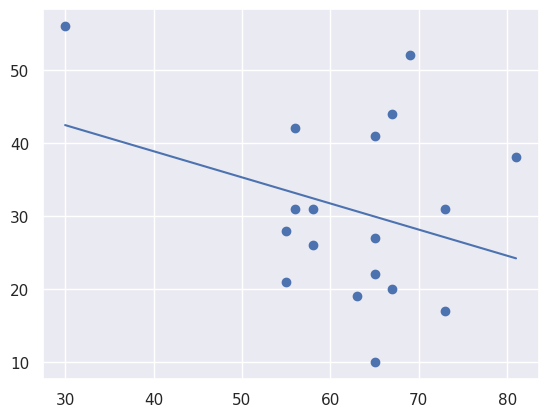

In [ ]:
# Visualize the result
import seaborn as sns
sns.set(style="darkgrid")
fig, ax = plt.subplots()
ax.scatter(data[["Defense Plays"]], y, marker='o')
x_axis = np.linspace(np.min(data[["Defense Plays"]]), np.max(data[["Defense Plays"]]), 500)
y_axis = reg.coef_[0,0] * x_axis + reg.intercept_
ax.plot(x_axis, y_axis)
plt.show()


In [ ]:
data = data[["Offense Plays", "Defense Plays", "Result"]]

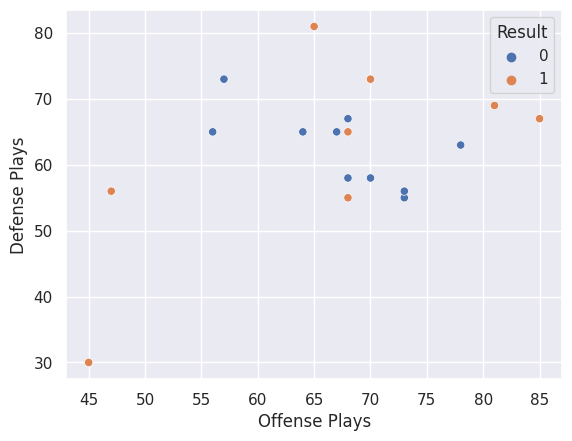

In [ ]:
#Try now with decision trees
from sklearn.tree import DecisionTreeRegressor
fig, ax = plt.subplots()
sns.scatterplot(data=data, x="Offense Plays", y="Defense Plays", hue='Result', ax=ax)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

In [ ]:
X=data[["Offense Plays", "Defense Plays"]].values # The features
y=data['Result'].values # The labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.6, 0.8333333333333334, 'Offense Plays <= 77.0\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]\nclass = lose'),
 Text(0.4, 0.5, 'Offense Plays <= 51.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]\nclass = lose'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = win'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]\nclass = lose'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = win')]

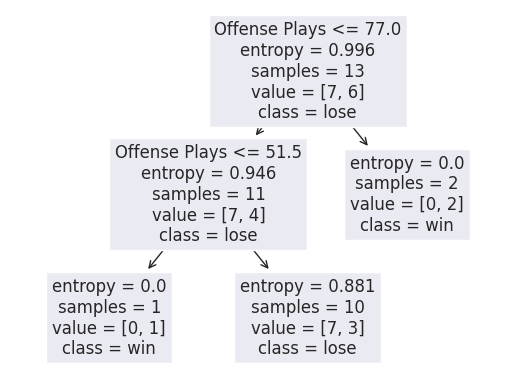

In [ ]:
# plot_tree(tree_clf)
plot_tree(tree_clf, feature_names=["Offense Plays", "Defense Plays"], class_names=['lose', 'win'])

In [ ]:
import itertools
from matplotlib.colors import ListedColormap

# Modified from A. Geron
def plot_decision_boundary(clf, X, y, legend=False, plot_training=True, ax=None, figsize=(10,6)):

    if not ax: f, ax = plt.subplots(figsize=figsize)

    # Convert to numpy arrays in case X and y are data frames
    X, y = np.array(X), np.array(y)

    x1 = X[:,0] # First feature
    x2 = X[:, 1] # Second feature


    x1s = np.linspace(np.min(x1)-0.1*np.mean(x1), 1.1*np.max(x1), 100)
    x2s = np.linspace(np.min(x2)-0.1*np.mean(x2), 1.1*np.max(x2), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    dots = ["yo", "bs", "g^"]

    if plot_training:
        for i in np.unique(y):

            ax.plot(X[:, 0][y==i], X[:, 1][y==i], dots[i], label=str(i))

    else:
        ax.set_xlabel(r"$x_1$", fontsize=18)
        ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    ax.legend(loc="lower right", fontsize=14)
    ax.set_title("Decision boundary")

    return ax

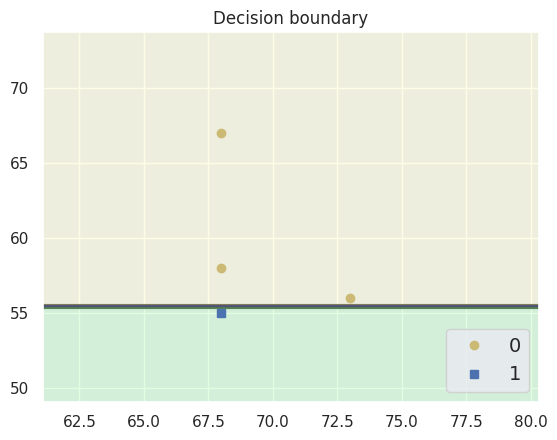

In [ ]:
fig, ax = plt.subplots()
ax = plot_decision_boundary(tree_clf, X_train,y_train, ax=ax)
plt.show()